# 평가 Evaluation

<table border="1" cellpadding="5" cellspacing="0">
  <thead>
    <tr>
      <th>이름</th>
      <th>설명</th>
      <th>관련 수식</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Accuracy (정확도)</td>
      <td>전체 샘플 중에서 올바르게 예측된 샘플의 비율을 나타낸다. 하지만 데이터가 불균형할 경우 유용하지 않을 수 있다.</td>
      <td>$$
      \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
      $$</td>
    </tr>
    <tr>
      <td>Precision (정밀도)</td>
      <td>모델이 Positive로 예측한 샘플 중 실제로 Positive인 샘플의 비율을 나타낸다. FP를 줄이는 데 중점을 둔다.</td>
      <td>$Precision = \frac{TP}{TP + FP}$</td>
    </tr>
    <tr>
      <td>Recall (재현율 또는 민감도)</td>
      <td>실제 Positive 샘플 중 모델이 Positive로 정확히 예측한 샘플의 비율을 나타낸다. FN을 줄이는 데 중점을 둔다.</td>
      <td>$Recall = \frac{TP}{TP + FN}$</td>
    </tr>
    <tr>
      <td>F1-Score (F1 점수)</td>
      <td>Precision과 Recall의 조화 평균을 나타내며, 불균형 데이터에서도 유용하다.</td>
      <td>$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$</td>
    </tr>
    <tr>
      <td>특이도 (Specificity)</td>
      <td>실제 부정인 것 중에서 모델이 부정으로 정확하게 예측한 비율</td>
      <td>$Specificity=\frac{TN}{TN + FP}$</td>
    </tr>
    <tr>
      <td>ROC Curve (수신자 조작 특성 곡선)</td>
      <td>모델의 분류 기준을 변경했을 때, True Positive Rate (Recall)와 False Positive Rate 간의 관계를 시각화한 그래프이다.</td>
      <td>$FPR = \frac{FP}{FP + TN},\ TPR = \frac{TP}{TP + FN}$</td>
    </tr>
    <tr>
      <td>AUC (Area Under Curve)</td>
      <td>ROC Curve 아래 면적을 나타내며, 1에 가까울수록 좋은 성능을 의미한다.</td>
      <td>AUC는 ROC Curve 아래의 면적을 의미</td>
    </tr>
  </tbody>
</table>

### 정확도 Accuracy
전체 샘플 중에서 올바르게 예측한 샘플의 비율

데이터가 불균형한 경우에 정확도는 비현실적 성능을 낼 수 있다.

100개 데이터 중에 실제 90개가 음성인 경우, 따지지 않고 모두 음성이라고 예측해도 정확도는 90%가 나온다.

In [93]:
from telnetlib import TELNET_PORT
from xml.dom.expatbuilder import TEXT_NODE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [94]:
# 성별로만 판별하는 모델 작성

from sklearn.base import BaseEstimator # fit, predict, score 사용 가능

class MyTitanicClassifier(BaseEstimator):
    def fit(self, X, y): # input data - X/ label - y
        '''
        훈련 메소드
        :param X: 독립변수 x의 모음 (입력데이터)
        :param y: 종속변수 y (라벨데이터)
        :return:
        '''
        pass

    def predict(self, X): # X는 test_input
        '''
        테스트 데이터 기준으로 결과(라벨)을 예측하는 메소드
        :param X: 평가용 독립변수 모음(test_input)
        :return:
        '''

        pred = np.zeros((X.shape[0], 1))

        for i in range(X.shape[0]):
            sex = X['Sex'].iloc[i]
            if sex == 0: #여성인 경우
                pred[i] = 1

        return pred


In [95]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


def fillna(df):
    '''
    - Age
    - Cabin
    - Embarked
    '''
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Embarked'] = df['Embarked'].fillna('N')
    return df

def drop_features(df):
    '''
    모델 훈련과 상관없는 속성 제거

    '''
    columns = ['PassengerId', 'Name', 'Ticket']
    return df.drop(columns, axis=1)

def encode_features(df):
    '''
    범주형 데이터를 숫자로 인코딩
    '''
    df['Cabin'] = df['Cabin'].str[:1] # 0번 인덱스만 사용하겠다.
    categories = ['Sex', 'Cabin', 'Embarked']

    for cate in categories:
        label_encoder = LabelEncoder()
        df[cate] = label_encoder.fit_transform(df[cate])
    return df

def preprocess_data(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode_features(df)
    return df


In [96]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data/titanic.csv')
# 입력/라벨 데이터 분리
X = df.drop('Survived', axis=1)
y = df['Survived']


# 전처리
X = preprocess_data(X)
X

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # 특징 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
#
# # 모델 훈련
#
# lr_classfier = LogisticRegression()
# lr_classifier = lr_classfier.fit(X_train_scaled, y_train)
#
# # 평가
# y_train_pred = lr_classifier.predict(X_train_scaled)
# y_train_pred

In [97]:
from sklearn.metrics import accuracy_score
# 모델 훈련 및 예측

my_classifier = MyTitanicClassifier()
my_classifier.fit(X_train, y_train) # 스케일링 안하고 진행

pred = my_classifier.predict(X_train)

score = accuracy_score(y_train, pred)
print('훈련데이터 점수 : ', score)


pred = my_classifier.predict(X_test)
score = accuracy_score(y_test, pred)
print('테스트데이터 점수 : ', score)


훈련데이터 점수 :  0.7889221556886228
테스트데이터 점수 :  0.7802690582959642


### 혼동행렬 Confusion Matrix
- True/False 는 정답/오답을 의미
- Positive/Negative 는 양성예측/음성예측을 의미한다.
---
뒤에서부터 보기
- TN : 음성을 예측했으나 정답임 (실제 음성)
- TP : 양성을 예측, 정답 (실제 양성)
- FN : 음성을 예측했고, 오답 (실제 양성)
- FP : 양성을 예측, 오답 (실제 음성)

![](https://d.pr/i/rtYBJv+) # 끝에 + 표시를 넣어야 완료됨

### 정밀도 Precision
양성이라고 예측한 것 중에 양성인 확률

$
    정밀도 = \frac{TP}{TP + FP}
$

** 정밀도가 중요한 지표**
- 음성인 데이터를 양성으로 예측하면 큰일나는 경우
- 스팸메일 분류 (스팸이 아닌 업무용 메일을 스팸메일이라고 분류하면 업무상 혼란이 야기됨.)

### 재현율 Recall
실제 양성 중에 양성으로 예측한 확률

$
    정밀도 = \frac{TP}{TP + FN}
$

** 재현율이 중요한 지표**
- 양성인 데이터를 음성으로 예측하는 경우
- 암진단
- 보험/금융사기

In [98]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

matrix = confusion_matrix(y_test, pred)
matrix

array([[115,  24],
       [ 25,  59]])

In [99]:
# 정밀도
precision_score(y_test, pred)

np.float64(0.7108433734939759)

In [100]:
# 재현율
recall_score(y_test, pred)


np.float64(0.7023809523809523)

In [101]:
# 모두 사망이라고 예측하는 모델 작성

from sklearn.base import BaseEstimator  # fit, predict, score 사용 가능


class MyDeathClassifier(BaseEstimator):
    def fit(self, X, y):  # input data - X/ label - y

        pass

    def predict(self, X):  # X는 test_input

        return np.zeros((X.shape[0], 1))

my_classifier2 = MyDeathClassifier()
my_classifier2.fit(X_train, y_train)

pred = my_classifier2.predict(X_train)
print('훈련 데이터 혼동행렬 : ', confusion_matrix(y_train, pred))
print('훈련 데이터 정확도 : ', accuracy_score(y_train, pred))
print('훈련 데이터 정밀도 : ', precision_score(y_train, pred))
print('훈련 데이터 재현율 : ', recall_score(y_train, pred))

pred = my_classifier2.predict(X_test)
print('테스트 데이터 혼동행렬 : ', confusion_matrix(y_test, pred))
print('테스트 데이터 정확도 : ', accuracy_score(y_test, pred))
print('테스트 데이터 정밀도 : ', precision_score(y_test, pred))
print('테스트 데이터 재현율 : ', recall_score(y_test, pred))

훈련 데이터 혼동행렬 :  [[410   0]
 [258   0]]
훈련 데이터 정확도 :  0.6137724550898204
훈련 데이터 정밀도 :  0.0
훈련 데이터 재현율 :  0.0
테스트 데이터 혼동행렬 :  [[139   0]
 [ 84   0]]
테스트 데이터 정확도 :  0.6233183856502242
테스트 데이터 정밀도 :  0.0
테스트 데이터 재현율 :  0.0


C:\Users\tngkr\miniconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tngkr\miniconda3\envs\dl_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
# 오차행렬, 정확도, 정밀도, 재현율 계산 함수
def evaluate_binary_classification(y_true, y_pred):
    print('혼동행렬 : \n', confusion_matrix(y_true, y_pred))
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}'.format(accuracy_score(y_true, y_pred), precision_score(y_true, y_pred), recall_score(y_true, y_pred)))


In [111]:
# 정상적인 타이타닉 모델 확인
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/titanic.csv')

# 입력/라벨 데이터 분리
X = df.drop('Survived', axis=1)
y = df['Survived']

# 전처리
X = preprocess_data(X)

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 특징 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델 훈련
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)

# 평가
y_train_pred = lr_classifier.predict(X_train_scaled)
evaluate_binary_classification(y_train, y_train_pred)

y_test_pred = lr_classifier.predict(X_test_scaled)
evaluate_binary_classification(y_test, y_test_pred)




혼동행렬 : 
 [[349  61]
 [ 75 183]]
정확도 : 0.7964, 정밀도 : 0.7500, 재현율 : 0.7093
혼동행렬 : 
 [[117  22]
 [ 23  61]]
정확도 : 0.7982, 정밀도 : 0.7349, 재현율 : 0.7262


### 정밀도-재현율의 trade-off
- 분류결정 임계치를 낮추면, Positive로 예측할 확률이 높아진다.
    - 정밀도는 낮아지고, 재현율이 높아진다.
- 분류결정 임계치를 높이면, Positive로 예측할 확률이 낮아진다.
    - 정밀도 높아지고, 재현율이 낮아진다.

In [116]:
# predict_proba - 선형회귀결과값 z에 따른 클래스별 비율 반환
predict_proba = lr_classifier.predict_proba(X_test_scaled)
predict_proba

print(predict_proba[:9])
pred = lr_classifier.predict(X_test_scaled) # 판단 결과 반환
print(pred[:9])

[[0.84483816 0.15516184]
 [0.89437144 0.10562856]
 [0.92598891 0.07401109]
 [0.05163537 0.94836463]
 [0.28551801 0.71448199]
 [0.51333381 0.48666619]
 [0.08526161 0.91473839]
 [0.06832819 0.93167181]
 [0.41757669 0.58242331]]
[0 0 0 1 1 0 1 1 1]


In [122]:
# Binarizer 클래스를 통한 임계치 조정 # Threshold : 임계치, Binarizer : 문턱 비슷한 의미
from sklearn.preprocessing import Binarizer
X = [[1, -1, 2],
     [2, 0, 0],
     [0, 1.1, 1.2]]

# threshold =0 ,
# - 0보다 작거나 같으면 0 반환, 음성
# - 0보다 크면 1 반환, 양성

binarizer = Binarizer(threshold=1) # 0 이 임계치, 이 값을 넘어야 1을 반환.
X_adj = binarizer.fit_transform(X)
X_adj

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.]])

In [125]:
# titanic 데이터에 적용해 보기
# 생존(양성) 값만 가져와서 배치차원 추가.
predict_proba1 = predict_proba[:, 1].reshape(-1,1) # 모든 행의 1번 index

binarizer = Binarizer(threshold=0.5)
custum_pred = binarizer.fit_transform(predict_proba1)
# custum_pred
evaluate_binary_classification(y_test, custum_pred)

binarizer = Binarizer(threshold=0.6)
custum_pred = binarizer.fit_transform(predict_proba1)
evaluate_binary_classification(y_test, custum_pred)

혼동행렬 : 
 [[117  22]
 [ 23  61]]
정확도 : 0.7982, 정밀도 : 0.7349, 재현율 : 0.7262
혼동행렬 : 
 [[124  15]
 [ 27  57]]
정확도 : 0.8117, 정밀도 : 0.7917, 재현율 : 0.6786


In [152]:
# 임계치 테스트를 위한 함수 작성
thresholds = [0.4, 0.45, 0.5, 0.55, 0.59, 0.6]

def evaluate_by_thresholds(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold = threshold)
        custum_pred = binarizer.fit_transform(y_pred)
        print(f'> 임계치 :  {threshold}')
        evaluate_binary_classification(y_true, custum_pred)


evaluate_by_thresholds(y_test, predict_proba1, thresholds)


> 임계치 :  0.4
혼동행렬 : 
 [[109  30]
 [ 19  65]]
정확도 : 0.7803, 정밀도 : 0.6842, 재현율 : 0.7738, F1스코어 :0.7263
> 임계치 :  0.45
혼동행렬 : 
 [[112  27]
 [ 19  65]]
정확도 : 0.7937, 정밀도 : 0.7065, 재현율 : 0.7738, F1스코어 :0.7386
> 임계치 :  0.5
혼동행렬 : 
 [[117  22]
 [ 23  61]]
정확도 : 0.7982, 정밀도 : 0.7349, 재현율 : 0.7262, F1스코어 :0.7305
> 임계치 :  0.55
혼동행렬 : 
 [[119  20]
 [ 23  61]]
정확도 : 0.8072, 정밀도 : 0.7531, 재현율 : 0.7262, F1스코어 :0.7394
> 임계치 :  0.59
혼동행렬 : 
 [[123  16]
 [ 25  59]]
정확도 : 0.8161, 정밀도 : 0.7867, 재현율 : 0.7024, F1스코어 :0.7421
> 임계치 :  0.6
혼동행렬 : 
 [[124  15]
 [ 27  57]]
정확도 : 0.8117, 정밀도 : 0.7917, 재현율 : 0.6786, F1스코어 :0.7308


In [133]:
# 정밀도-재현율 변화과정 시각화
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, predict_proba1)

thresholds

# thresholds에 따른 precision, recall값을 각각 반환한다.
# thresholds(up), precision(up), recall(down)

# 기준 thresholds 221개
# - 정밀도는 마지막에 1이 추가
# - 재현율은 마지막에 0이 추가
precisions.shape, recalls.shape, thresholds.shape # precision recall 함수 설계에서 각각 1, 0 이 더해지기 때문에 요소 개수가 1개씩 증가.


((212,), (212,), (211,))

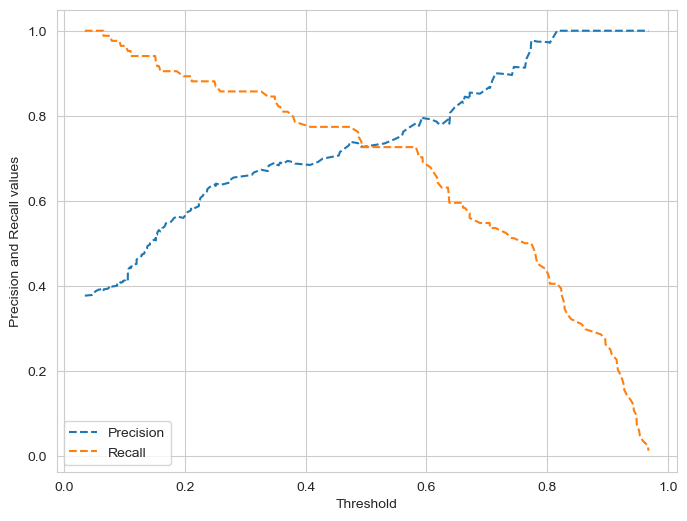

In [143]:
def precision_recall_curve_plot(y_true, y_pred):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred) # 정밀도, 재현율, 임계치 반환

    plt.figure(figsize=(8, 6))
    # 정밀도 plot
    plt.plot(thresholds, precisions[:-1], linestyle='--', label='Precision')

    # 재현율 plot
    plt.plot(thresholds, recalls[:-1], linestyle='--', label='Recall')

    plt.xlabel('Threshold')
    plt.ylabel('Precision and Recall values')
    plt.legend()
    plt.show()

precision_recall_curve_plot(y_test, predict_proba1)

### F1-score
정밀도와 재현율을 결합한 지표.
$
F1 = \frac{2 \times precision \times recall}{precision + recall}
$

In [144]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

np.float64(0.7305389221556886)

In [150]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1-score 계산 함수
def evaluate_binary_classification(y_true, y_pred):
    print('혼동행렬 : \n', confusion_matrix(y_true, y_pred))
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1스코어 :{3:.4f}'.format(accuracy_score(y_true, y_pred),
                                                               precision_score(y_true, y_pred),
                                                               recall_score(y_true, y_pred),f1_score(y_true, y_pred)))
    # formating, 0번은 뒤에 있는 format 이후 첫번째 꺼 가져옴, 1번은 두번쨰꺼
    # 임계치 테스트를 위한 함수 작성


In [153]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.59, 0.6]


def evaluate_by_thresholds(y_true, y_pred, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold)
        custum_pred = binarizer.fit_transform(y_pred)
        print(f'> 임계치 :  {threshold}')
        evaluate_binary_classification(y_true, custum_pred)


evaluate_by_thresholds(y_test, predict_proba1, thresholds)  # 임계치 상승에 따라 정밀도는 상승, 재현율은 감소, 하지만 정확도는 0.59에서 피크 후 감소, F1의 경우, 요동침, 0.59에서 F1도 정확도와 같이 peak값을 가짐. 따라서, 0.59를 임계치로 설정할만함

> 임계치 :  0.4
혼동행렬 : 
 [[109  30]
 [ 19  65]]
정확도 : 0.7803, 정밀도 : 0.6842, 재현율 : 0.7738, F1스코어 :0.7263
> 임계치 :  0.45
혼동행렬 : 
 [[112  27]
 [ 19  65]]
정확도 : 0.7937, 정밀도 : 0.7065, 재현율 : 0.7738, F1스코어 :0.7386
> 임계치 :  0.5
혼동행렬 : 
 [[117  22]
 [ 23  61]]
정확도 : 0.7982, 정밀도 : 0.7349, 재현율 : 0.7262, F1스코어 :0.7305
> 임계치 :  0.55
혼동행렬 : 
 [[119  20]
 [ 23  61]]
정확도 : 0.8072, 정밀도 : 0.7531, 재현율 : 0.7262, F1스코어 :0.7394
> 임계치 :  0.59
혼동행렬 : 
 [[123  16]
 [ 25  59]]
정확도 : 0.8161, 정밀도 : 0.7867, 재현율 : 0.7024, F1스코어 :0.7421
> 임계치 :  0.6
혼동행렬 : 
 [[124  15]
 [ 27  57]]
정확도 : 0.8117, 정밀도 : 0.7917, 재현율 : 0.6786, F1스코어 :0.7308


## 회귀모델 평가
분류와 달리 True/False로 평가하지 않고, 실제값과 예측값사이의 오차로써 평가한다.

<table border="1" cellpadding="5" cellspacing="0">
    <thead>
        <tr>
            <th>평가 지표</th>
            <th>설명</th>
            <th>LaTeX 수식</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>평균 제곱 오차 (MSE)</strong></td>
            <td>예측 값과 실제 값의 차이를 제곱하여 평균을 낸 값입니다.</td>
            <td>$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$</td>
        </tr>
        <tr>
            <td><strong>평균 절대 오차 (MAE)</strong></td>
            <td>예측 값과 실제 값의 차이의 절대값을 평균한 값입니다.</td>
            <td>$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$</td>
        </tr>
        <tr>
            <td><strong>루트 평균 제곱 오차 (RMSE)</strong></td>
            <td>평균 제곱 오차의 제곱근으로, 실제 오차의 크기와 같은 단위를 가집니다. 큰 오차에 대해 더 가중치를 부여하므로 MAE 대비 크다.</td>
            <td>
            $$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
            $$</td>
        </tr>
        <tr>
            <td><strong>평균 제곱 로그 오차 (MSLE)</strong></td>
            <td>실제 값과 예측 값의 로그 차이를 제곱하여 평균을 낸 값입니다.</td>
            <td>$$\text{MSLE} = \frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2$$</td>
        </tr>
        <tr>
            <td><strong>루트 평균 제곱 로그 오차 (RMSLE)</strong></td>
            <td>MSLE의 제곱근으로, 로그 스케일에서의 예측 정확도를 측정합니다.</td>
            <td>$$
            RMSLE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(y_i + 1) - \log(\hat{y}_i + 1) \right)^2}$$</td>
        </tr>
        <tr>
            <td><strong>결정 계수 (R-squared, $R^2$)<strong></td>
            <td>모델이 데이터의 변동성을 얼마나 설명하는지를 나타냅니다.</td>
            <td>$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$</td>
        </tr>
        <tr>
            <td>조정된 결정 계수 (Adjusted $R^2$)</td>
            <td>독립 변수의 개수를 고려하여 조정한 결정 계수입니다.</td>
            <td>$$\text{Adjusted } R^2 = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$$</td>
        </tr>
        <tr>
            <td>설명 분산 점수 (Explained Variance)</td>
            <td>예측이 실제 데이터를 얼마나 잘 설명하는지를 나타냅니다.</td>
            <td>$$\text{Explained Variance} = 1 - \frac{\text{Var}(y - \hat{y})}{\text{Var}(y)}$$</td>
        </tr>
        <tr>
            <td>평균 절대 백분율 오차 (MAPE)</td>
            <td>예측 값과 실제 값의 차이를 실제 값으로 나눈 백분율의 절대값을 평균한 값입니다.</td>
            <td>$$\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$$</td>
        </tr>
        <tr>
            <td>최대 절대 오차 (Max Error)</td>
            <td>가장 큰 오차의 절대값을 측정합니다.</td>
            <td>$$\text{Max Error} = \max(|y_i - \hat{y}_i|)$$</td>
        </tr>
        <tr>
            <td>Huber Loss</td>
            <td>MSE와 MAE의 장점을 결합한 손실 함수입니다.</td>
            <td>$$L_\delta(y, \hat{y}) = \begin{cases} \frac{1}{2}(y_i - \hat{y}_i)^2, & \text{if } |y_i - \hat{y}_i| \le \delta \\ \delta(|y_i - \hat{y}_i| - \frac{1}{2}\delta), & \text{otherwise} \end{cases}$$ </td>
        </tr>
        <tr>
            <td>로그 코사인 이탈 (Log-Cosh Loss)</td>
            <td>로그 하이퍼볼릭 코사인 함수의 값을 손실로 사용합니다.</td>
            <td>$$\text{Log-Cosh Loss} = \sum_{i=1}^{n} \log(\cosh(\hat{y}_i - y_i))$$</td>
        </tr>
        <tr>
            <td>대수 평균 제곱 오차 (Log-MSE)</td>
            <td>예측 값의 로그와 실제 값의 로그 간의 차이를 제곱하여 평균을 낸 값입니다.</td>
            <td>$$\text{Log-MSE} = \frac{1}{n} \sum_{i=1}^{n} (\log(y_i + 1) - \log(\hat{y}_i + 1))^2$$</td>
        </tr>
    </tbody>
</table>



In [154]:
# 샘플 데이터
y_true = [3, 0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 9]

In [155]:
# MSE Mean Squared Error 평균 제곱 오차
# 잔차(실제값 - 예측값) 제곱하고, 평균낸 값
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

np.float64(1.125)

In [156]:
# MAE Mean Absolute Error 평균 절대 오차
# 잔차의 절대값을 평균낸 값
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

np.float64(0.75)

In [157]:
# MSLE 평균 제곱 로그 오차
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_true, y_pred)

np.float64(0.058006407800631835)

In [158]:
# RMSE 루트 평균 제곱 오차
from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_true, y_pred)

np.float64(1.0606601717798212)

In [159]:
# RMSLE 루트 평균 제곱 로그 오차
from sklearn.metrics import root_mean_squared_log_error
root_mean_squared_log_error(y_true, y_pred)

np.float64(0.2408451946803835)

In [160]:
# R^2 결정계수
# 회귀모델 기본 score 함수에 적용되어 있다.
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

0.8059299191374663